<div>
<img src="images/Logo_Gaia_may_23_2022.png" width="300" align="right"/>
</div>


# Tutorial:  Retrieve (all) the DataLink products associated to a sample

<br />
<br />
<br />
<br />
<br />


**Release number:** 
v1.0.1 (2022-12-06)


**Applicable Gaia Data Releases:**
Gaia EDR3, Gaia DR3

**Author:**
Héctor Cánovas Cabrera; hector.canovas@esa.int

**Summary:** 

This code shows how to retrieve the different DataLink products from an input list of Gaia DR3 sources. These products are serialised in three different data structures:
* INDIVIDUAL
* COMBINED, and
* RAW

Although all data structures contain virtually the same information, the RAW format - the internal format used by the [Gaia collaboration](https://www.cosmos.esa.int/web/gaia/dpac/consortium) -  is not intended for the final users (see for details the [DataLink: Products serialisation tutorial](https://www.cosmos.esa.int/web/gaia-users/archive/datalink-products#datalink_serialisation)). This notebook shows the content of the INDIVIDUAL & COMBINED products, whose serialisation follows different [IVOA](https://www.ivoa.net) data model recommendations and it allows to easily inspect the product content. We recommend to select the COMBINED format when downloading DataLink products for large (>1000) amounts of sources to reduce the total download time.



**Useful URLs:**

* [Questions or suggestions](https://www.cosmos.esa.int/web/gaia/questions)
* [Tutorials, documentation, and more](https://www.cosmos.esa.int/web/gaia-users/archive)
* [Known issues in the Gaia data](https://www.cosmos.esa.int/web/gaia-users/known-issues)
* [Gaia data credits and acknowledgements](https://www.cosmos.esa.int/web/gaia-users/credits)
* [GaiaXPy](https://gaia-dpci.github.io/GaiaXPy-website/): GaiaXPy is a Python library to facilitate handling Gaia BP/RP spectra as distributed from the Gaia archive.

In [1]:
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt

In [2]:
def extract_dl_ind(datalink_dict, key, figsize = [15,5], fontsize = 12, linewidth = 2, show_legend = True, show_grid = True):
    ""
    "Extract individual DataLink products and export them to an Astropy Table"
    ""       
    dl_out  = datalink_dict[key][0].to_table()
    if 'time' in dl_out.keys():
        plot_e_phot(dl_out, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = fontsize, show_legend = show_legend, show_grid = show_grid, figsize = figsize)
    if 'wavelength' in dl_out.keys():
        if len(dl_out) == 343:  title = 'XP Sampled'
        if len(dl_out) == 2401: title = 'RVS'
        plot_sampled_spec(dl_out, color = 'blue', title = title, fontsize = fontsize, show_legend = False, show_grid = show_grid, linewidth = linewidth, legend = '', figsize = figsize)
    return dl_out    


def plot_e_phot(inp_table, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = 12, show_legend = True, show_grid = True, figsize = [15,5]):
    ""
    "Epoch photometry plotter. 'inp_table' MUST be an Astropy-table object."
    ""       
    fig      = plt.figure(figsize=figsize)
    xlabel   = f'JD date [{inp_table["time"].unit}]'
    ylabel   = f'magnitude [{inp_table["mag"].unit}]'
    gbands   = ['G', 'RP', 'BP']  
    colours  = iter(colours)

    plt.gca().invert_yaxis()
    for band in gbands:
        phot_set = inp_table[inp_table['band'] == band]
        plt.plot(phot_set['time'], phot_set['mag'], 'o', label = band, color = next(colours))
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    plt.show()

    
def plot_sampled_spec(inp_table, color = 'blue', title = '', fontsize = 14, show_legend = True, show_grid = True, linewidth = 2, legend = '', figsize = [12,4], show_plot = True):
    ""
    "RVS & XP sampled spectrum plotter. 'inp_table' MUST be an Astropy-table object."
    ""       
    if show_plot:
        fig      = plt.figure(figsize=figsize)
    xlabel   = f'Wavelength [{inp_table["wavelength"].unit}]'
    ylabel   = f'Flux [{inp_table["flux"].unit}]'
    plt.plot(inp_table['wavelength'], inp_table['flux'], '-', linewidth = linewidth, label = legend)
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    if show_plot:
        plt.show()


def make_canvas(title = '', xlabel = '', ylabel = '', show_grid = False, show_legend = False, fontsize = 12):
    ""
    "Create generic canvas for plots"
    ""
    plt.title(title,    fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.ylabel(ylabel , fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize = fontsize*0.75)

## Connect to the Gaia Archive

The DataLink products are available to both registered & anonymous users. However, we recommend to access as a registered user due to their extra benefits when executing long queries (as explained in this [FAQ](https://www.cosmos.esa.int/web/gaia-users/archive/faq#account-limits-2020)).

In [3]:
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]
User: hcanovas
Password: ········
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


##  Download data sample

The query below retrieves a random sample of Gaia (E)DR3 sources having all types of DataLink products.

In [4]:
query = f"SELECT source_id, ra, dec, pmra, pmdec, parallax \
FROM gaiadr3.gaia_source \
WHERE has_epoch_photometry = 'True' \
AND has_xp_sampled = 'True'\
AND has_rvs = 'True' \
AND has_mcmc_msc = 'True' \
AND has_mcmc_gspphot = 'True' \
AND random_index between 0 and 200000"


job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
results

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 3


source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6196457933368101888,202.80436078238418,-21.178991138861807,80.54562044679744,-32.95247075512294,10.167137280246173
5924045608237672448,257.635024432604,-53.35065341915946,-4.404105752618793,-6.63122508730231,0.19938320884996538
4911590910260264960,24.783541498908786,-55.317468647500505,40.64757827861938,10.758104689073546,6.2453699013330555


## Download  DataLink Products: INDIVIDUAL

The example below retrieves ALL available DataLink products for the input sample of Gaia Source IDs. This option significantly increases the total download time, and here it is selected only for teaching purposes. If you are not interested in downloading all products we recommend you to specify the DataLink product in ```retrieval_type```.

The downloaded files can be stored locally by specifying the output file directory via the ```output_file``` option in the ```load_data``` method below. Note that:
* The DataLink products are stored in a .gz compressed directory. To avoid errors, this shoud be considered when naming the output file, e.g., ```output_file = 'datalink_output.gz'```
* The individual files will also be saved in the same directory from where this notebook is being launched. This is a known bug and we are working to fix it.
* Finally, the metadata of some of the products raises an Astropy units warning. This is a known issue and we are also working on it.

In [5]:
retrieval_type = 'ALL'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink = Gaia.load_data(ids=results['source_id'], data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)
dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 4911590910260264960.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 5924045608237672448.xml
 * EPOCH_PHOTOMETRY-Gaia DR3 6196457933368101888.xml
 * MCMC_GSPPHOT-Gaia DR3 4911590910260264960.xml
 * MCMC_GSPPHOT-Gaia DR3 5924045608237672448.xml
 * MCMC_GSPPHOT-Gaia DR3 6196457933368101888.xml
 * MCMC_MSC-Gaia DR3 4911590910260264960.xml
 * MCMC_MSC-Gaia DR3 5924045608237672448.xml
 * MCMC_MSC-Gaia DR3 6196457933368101888.xml
 * RVS-Gaia DR3 4911590910260264960.xml
 * RVS-Gaia DR3 5924045608237672448.xml
 * RVS-Gaia DR3 6196457933368101888.xml
 * XP_CONTINUOUS-Gaia DR3 4911590910260264960.xml
 * XP_CONTINUOUS-Gaia DR3 5924045608237672448.xml
 * XP_CONTINUOUS-Gaia DR3 6196457933368101888.xml
 * XP_SAMPLED-Gaia DR3 4911590910260264960.xml
 * XP_SAMPLED-Gaia DR3 5924045608237672448.xml
 * XP_SAMPLED-Gaia DR3 6196457933368101888.xml


### Detailed content

The DataLink products are stored inside a Python Dictionary, where each element (key) contains a one-element list. In addition:

* The epoch photometry, MCMC's, and XP continuous products consist in a table that includes a "source_id" field.

* The XP sampled and RVS products consist in a table that is serialised following the [IVOA Spectrum Data Model](https://www.ivoa.net/documents/SpectrumDM/) (see for details the [DataLink: Products serialisation tutorial](https://www.cosmos.esa.int/web/gaia-users/archive/datalink-products#datalink_serialisation)). As a result, a number of parameters (including the the source_id) associated to these files is stored in the table metadata. The cell below shows how to extract these parameters, and how to export the table content to an Astropy Table object.

In [12]:
dl_key   = 'RVS-Gaia DR3 6196457933368101888.xml' # Try out using other XP_Sampled or RVS products (e.g., 'XP_SAMPLED-Gaia DR3 4911590910260264960.xml')
product  = datalink[dl_key][0]
items    = [item for item in product.iter_fields_and_params()]

if 'RVS' in dl_key or 'XP_SAMPLED' in dl_key:
    for item in items:
        print(item)
    print()
    print(f'Showing data for source_id: {product.get_field_by_id("source_id").value}')    

prod_tab = product.to_table()
prod_tab[0:5]

<PARAM ID="source_id" datatype="long" name="source_id" ucd="meta.id;meta.main" value="6196457933368101888"/>
<PARAM ID="solution_id" datatype="long" name="solution_id" ucd="meta.version" value="5950420259779346465"/>
<PARAM ID="combined_transits" datatype="int" name="combined_transits" ucd="meta.number" value="26"/>
<PARAM ID="combined_ccds" datatype="int" name="combined_ccds" ucd="meta.number" value="73"/>
<PARAM ID="deblended_ccds" datatype="int" name="deblended_ccds" ucd="meta.number" value="6"/>
<PARAM ID="spatialLocation" arraysize="2" datatype="double" name="spatialLocation" ucd="pos.eq" unit="deg" utype="spec:Char.SpatialAxis.Coverage.Location.Value" value="[202.80436078 -21.17899114]"/>
<PARAM ID="TimeAxisCoverageLocation" datatype="double" name="TimeAxisCoverageLocation" ucd="time.epoch" unit="yr" utype="spec:Char.TimeAxis.Coverage.Location.Value" value="2016.0"/>
<PARAM ID="TimeAxisCoverageBoundsExtent" datatype="double" name="TimeAxisCoverageBoundsExtent" ucd="time.duration"

wavelength,flux,flux_error
nm,,
float64,float32,float32
846.0,0.9810099,0.016027793
846.01,0.96773505,0.02387072
846.02,0.9449764,0.02818237
846.03,0.9631098,0.022609279
846.04,0.99672407,0.020400077


The code below creates a plot if the downloaded product contains epoch photometry or a sampled spectrum (RVS or XP). Try yourself and examine the content of the different products by commenting/uncommenting the ```dl_key``` variable below. The table displayed below only shows the first 5 elements to shorten this Notebook.

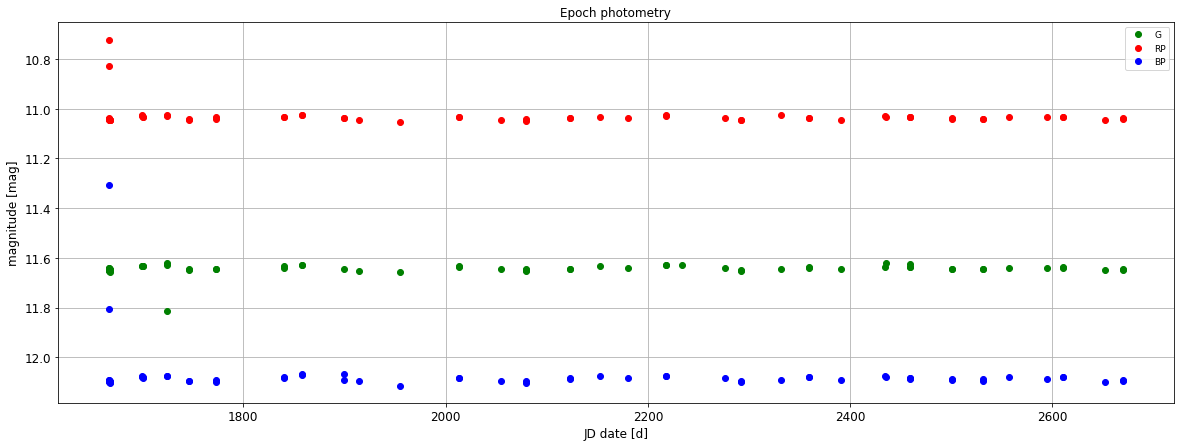

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
,,,d,mag,electron / s,electron / s,,,,,
int64,int64,object,float64,float64,float64,float64,float32,bool,bool,int64,int64
4911590910260264960,14922212505719965,G,1666.7066178487407,11.642262897057917,414993.78049738676,487.08184643327724,852.0001,False,False,4097,375316653866487564
4911590910260264960,14936045572629106,G,1666.9567829719524,11.641661753520346,415223.6152432905,756.6865282971511,548.73926,False,False,4609,375316653866487564
4911590910260264960,14945786367190460,G,1667.132946715427,11.648596812514562,412579.85777377436,264.43392219174564,1560.238,False,False,4097,375316653866487564
4911590910260264960,14949878655266891,G,1667.2069563968746,11.643335932713073,414583.84376818856,531.3042654941166,780.3134,False,False,4097,375316653866487564
4911590910260264960,14959619461231507,G,1667.3831203042998,11.649341777555474,412296.8680857516,249.81574135962032,1650.4039,False,False,4097,375316653866487564


In [13]:
dl_key  = 'EPOCH_PHOTOMETRY-Gaia DR3 4911590910260264960.xml'
# dl_key  = 'MCMC_MSC-Gaia DR3 5924045608237672448.xml'
# dl_key  = 'MCMC_GSPPHOT-Gaia DR3 5924045608237672448.xml'
# dl_key  = 'XP_CONTINUOUS-Gaia DR3 4911590910260264960.xml'
# dl_key  = 'RVS-Gaia DR3 6196457933368101888.xml'
# dl_key  = 'XP_SAMPLED-Gaia DR3 6196457933368101888.xml'

dl_out  = extract_dl_ind(datalink, dl_key, figsize=[20,7])   # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.
dl_out[0:5]                                                  # Remove the '[0:5]' to display the entire table.

## Download COMBINED DataLink Products 



As it happens with the INDIVIDUAL example above, the following example retrieves ALL available DataLink products for the input sample of Gaia Source IDs. If you are not interested in downloading all products we recommend you to specify the DataLink product in ```retrieval_type``` (e.g., ```retrieval_type = 'RVS'```)

In [14]:
retrieval_type = 'ALL'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'COMBINED'     # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink  = Gaia.load_data(ids=results['source_id'], data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)
dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY_COMBINED.xml
 * MCMC_GSPPHOT_COMBINED.xml
 * MCMC_MSC_COMBINED.xml
 * RVS_COMBINED.xml
 * XP_CONTINUOUS_COMBINED.xml
 * XP_SAMPLED_COMBINED.xml


### Detailed content

The DataLink products are stored inside a Python Dictionary, where each element (key) contains a one- or a multi-element list, depending on the product:

* The epoch photometry, MCMC's, and XP continuous products consist in a single-element list, which is a table that includes a "source_id" field.

* The XP sampled and RVS products consist in a multi-element list, where each element is a table serialised following the [IVOA Spectrum Data Model](https://www.ivoa.net/documents/SpectrumDM/).

#### Extract data for individual sources (epoch photometry, MCMC's, and XP continuous)

The table displayed below only shows the first 5 elements to shorten this Notebook.

In [15]:
dl_key      = 'EPOCH_PHOTOMETRY_COMBINED.xml'     # Try also with 'XP_CONTINUOUS_COMBINED.xml', 'MCMC_MSC_COMBINED.xml', 'MCMC_GSPPHOT_COMBINED.xml'
product     = datalink[dl_key][0]
product_tb  = product.to_table()                  # Export to Astropy Table object.
source_ids  = list(set(product_tb['source_id']))  # Detect source_ids.
print(f' There is data for the following Source IDs:')
for source_id in source_ids:
    print(f'* {source_id}')


inp_source = source_ids[0]                        # Replace "1" by "0" or "2" to show the data for the individual sources.
product_tb = product_tb[product_tb['source_id'] == inp_source]

print()
print(f'Showing data for source_id {inp_source}')
product_tb[0:5]                                   # Remove the '[0:5]' to display the entire table.

 There is data for the following Source IDs:
* 4911590910260264960
* 6196457933368101888
* 5924045608237672448

Showing data for source_id 4911590910260264960


source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
,,,d,mag,electron / s,electron / s,,,,,
int64,int64,object,float64,float64,float64,float64,float32,bool,bool,int64,int64
4911590910260264960,14922212505719965,G,1666.7066178487407,11.642262897057917,414993.78049738676,487.08184643327724,852.0001,False,False,4097,375316653866487564
4911590910260264960,14936045572629106,G,1666.9567829719524,11.641661753520346,415223.6152432905,756.6865282971511,548.73926,False,False,4609,375316653866487564
4911590910260264960,14945786367190460,G,1667.132946715427,11.648596812514562,412579.85777377436,264.43392219174564,1560.238,False,False,4097,375316653866487564
4911590910260264960,14949878655266891,G,1667.2069563968746,11.643335932713073,414583.84376818856,531.3042654941166,780.3134,False,False,4097,375316653866487564
4911590910260264960,14959619461231507,G,1667.3831203042998,11.649341777555474,412296.8680857516,249.81574135962032,1650.4039,False,False,4097,375316653866487564


#### Extract data for individual sources (XP sampled and RVS)

In [16]:
dl_key   = 'RVS_COMBINED.xml'    # Try also with 'XP_SAMPLED_COMBINED.xml'
product  = datalink[dl_key][0]   # Replace "1" by "0" or "2" to show the data for the individual sources.
items    = [item for item in product.iter_fields_and_params()]

for item in items:
    print(item)

print()
print(f'Showing data for source_id: {product.get_field_by_id("source_id").value}')    
prod_tab = product.to_table()
prod_tab[0:5]

<PARAM ID="source_id" datatype="long" name="source_id" ucd="meta.id;meta.main" value="6196457933368101888"/>
<PARAM ID="solution_id" datatype="long" name="solution_id" ucd="meta.version" value="5950420259779346465"/>
<PARAM ID="combined_transits" datatype="int" name="combined_transits" ucd="meta.number" value="26"/>
<PARAM ID="combined_ccds" datatype="int" name="combined_ccds" ucd="meta.number" value="73"/>
<PARAM ID="deblended_ccds" datatype="int" name="deblended_ccds" ucd="meta.number" value="6"/>
<PARAM ID="spatialLocation" arraysize="2" datatype="double" name="spatialLocation" ucd="pos.eq" unit="deg" utype="spec:Char.SpatialAxis.Coverage.Location.Value" value="[202.80436078 -21.17899114]"/>
<PARAM ID="TimeAxisCoverageLocation" datatype="double" name="TimeAxisCoverageLocation" ucd="time.epoch" unit="yr" utype="spec:Char.TimeAxis.Coverage.Location.Value" value="2016.0"/>
<PARAM ID="TimeAxisCoverageBoundsExtent" datatype="double" name="TimeAxisCoverageBoundsExtent" ucd="time.duration"

wavelength,flux,flux_error
nm,,
float64,float32,float32
846.0,0.9810099,0.016027793
846.01,0.96773505,0.02387072
846.02,0.9449764,0.02818237
846.03,0.9631098,0.022609279
846.04,0.99672407,0.020400077


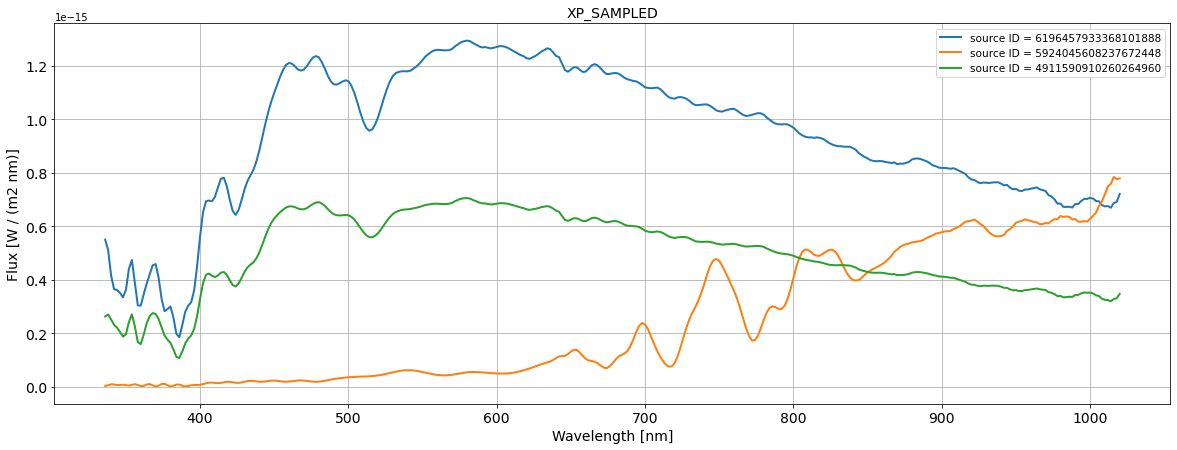

In [19]:
dl_key      = 'XP_SAMPLED_COMBINED.xml'          # Try also with 'RVS_COMBINED.xml'
source_ids  = [product.get_field_by_id("source_id").value for product in datalink[dl_key]]
tables      = [product.to_table()                         for product in datalink[dl_key]]


fig          = plt.figure(figsize=[20,7])        # Change the figsize to e.g. figsize=[30,7] to increase the size of the displayed image.
source_ids_i = iter(source_ids)
for inp_table in tables:
    plot_sampled_spec(inp_table, title=dl_key.replace('_COMBINED.xml', ''), legend = f'source ID = {next(source_ids_i)}', show_plot=False)
plt.show()